# Resampling, interpolating, extrapolating

In [1]:
import numpy as np
import scipy.io as sio
import scipy.signal as signal
import scipy.stats
from scipy.interpolate import griddata
from matplotlib import pyplot as plt
import copy

# Required for interactive plots in DataSpell
# import matplotlib
# matplotlib.use("nbagg")

### Load data

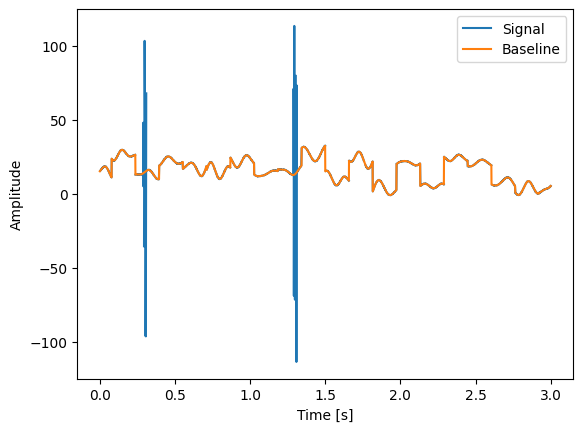

In [2]:
challengeData = sio.loadmat("Datasets/resample_codeChallenge.mat")

originalSignal = challengeData['origS'].flatten()
originalTime = challengeData['origT'].flatten()

corruptedSignal = challengeData['signal'].flatten()
time = challengeData['time'].flatten()

n = corruptedSignal.size

# Visualize data
plt.figure()
plt.plot(time, corruptedSignal, label='Signal')
plt.plot(originalTime, originalSignal, label='Baseline')

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

### Challenge
We can see that the data has multiple issues:
- Some values are NaN
- There are 2 error bursts that need to be corrected
- The signal is sampled irregularly

We are going to solve these issues in the following steps:

1. First, remove all NaN values, these contain no information.
2. Second, note the locations of the 2 error burtst and remove them.
3. Third, resample the signal such that we have a consant sampling rate.

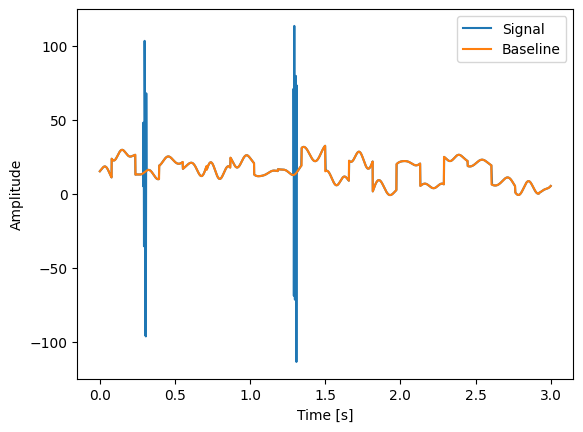

In [3]:
### Removing NaN values
indiceToRemove = np.isnan(corruptedSignal)

correctedSignal = np.delete(corruptedSignal, indiceToRemove)
correctedTime = np.delete(time, indiceToRemove)

plt.figure()
plt.plot(correctedTime, correctedSignal, label='Signal')
plt.plot(originalTime, originalSignal, label='Baseline')

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

Visual inspection of the peaks shows the peak one is containted in [185 - 201] and peak two is contained in [831 - 847]. Would be nice to automatically detect these peaks.

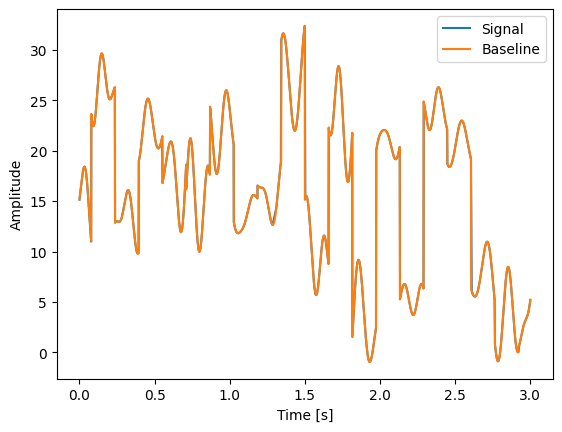

In [12]:
### Remove peaks
indiceToRemove = np.array(list(range(185, 201)) + list(range(831, 847)))

correctedSignal2 = np.delete(correctedSignal, indiceToRemove)
correctedTime2 = np.delete(correctedTime, indiceToRemove)

plt.figure()
plt.plot(correctedTime2, correctedSignal2, label='Signal')
plt.plot(originalTime, originalSignal, label='Baseline')

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

While the signals look very comparable right now, there are small inaccuracies due to missing sampling points. Lets resample and interpolate

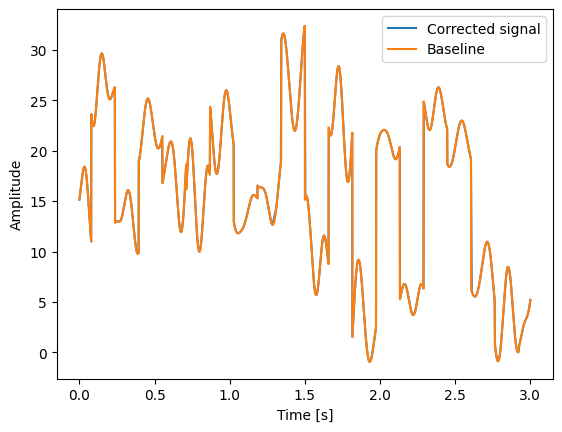

Correlation between original and reconstructed signal: 0.998


In [11]:
### Resample to constant sample rate
## Linear is the best fit due to the discontinuities in the signal, the cubic approach would create wierd loops to fit the jumps.
newsignal = griddata(correctedTime2, correctedSignal2, originalTime, method='linear')

plt.figure()
plt.plot(originalTime, newsignal, label='Corrected signal')
plt.plot(originalTime, originalSignal, label='Baseline')

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

correlation = np.corrcoef(newsignal, originalSignal)[1, 0]
print(f"Correlation between original and reconstructed signal: {correlation:.3f}")


Nice! that is a close reconstruction of the original data.